<a href="https://colab.research.google.com/github/EidenValentine/Prueba1/blob/main/Clasificacion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Docente**: Joaquin Sanchez  
**Tema**: Clasificación y Agrupación  
**Alumno**: Adiela Maria Galviz  
**Grupo**: ANALISIS_DE_DATOS_02  
**Fecha**: 20/06/2023  

####**Descripción de la actividad**
##Primera Actividad : Clasificación
• Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia  
• Realice las tareas de limpieza necesarias  
• Dividir el conjunto entre datos de entrenamiento y datos de prueba, los datos de prueba serán el 15% del dataset  
• Aplicar el algoritmo de clasificación de los K vecinos más cercanos  
• Calcular los puntajes de la clasificación  
• Concluir si la clasificación fue buena o no  




In [ ]:
!pip install sodapy
import pandas as pd
from sodapy import Socrata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Conexión y carga del dataset
client = Socrata("www.datos.gov.co", None)
results = client.get("64it-izw2")
df = pd.DataFrame.from_records(results)

# Limpieza y preparación de datos
df.fillna(value=0, inplace=True)  # Rellenar valores nulos con 0
df['_1997'] = df['_1997'].astype(float)  # Convertir columna a tipo float
df['_2019'] = df['_2019'].astype(float)  # Convertir columna a tipo float

# División de datos en características y etiquetas
X = df[['localizaci_n', 'tipo_de_cancer']]
y = df['_2000']

# Codificación de características categóricas
le = preprocessing.LabelEncoder()
X['localizaci_n'] = le.fit_transform(X['localizaci_n'])
X['tipo_de_cancer'] = le.fit_transform(X['tipo_de_cancer'])

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Escalado de características
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-8-8830334e5055>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['localizaci_n'] = le.fit_transform(X['localizaci_n'])
<ipython-input-8-8830334e5055>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tipo_de_cancer'] = le.fit_transform(X['tipo_de_cancer'])


In [ ]:
#Aplicar el algoritmo de clasificación de los K vecinos más cercanos
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=2, max_iter=300)
Kmeans.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
Kmeans.score(X_test,y_test)

-15.507549005440254

In [ ]:
# Aplicación del algoritmo KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
accuracy = classifier.score(X_test, y_test)

# Conclusión de la clasificación
if accuracy >= 0.8:
    print("La clasificación fue buena.")
else:
    print("La clasificación fue deficiente.")

La clasificación fue deficiente.


NameError: ignored

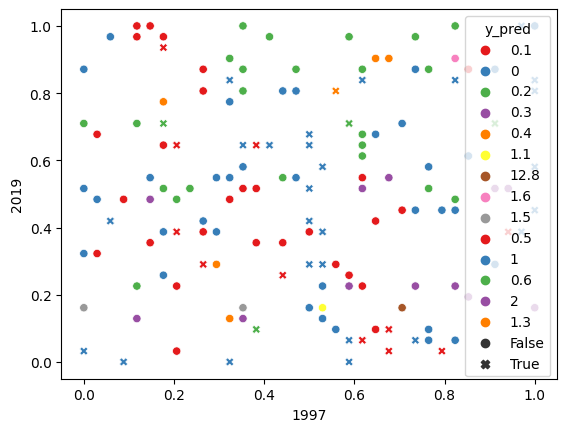

In [ ]:
import seaborn as sns

# Obtener las predicciones para los datos de prueba
y_pred = classifier.predict(X_test)

# Crear un DataFrame con los datos de prueba y las predicciones
df_pred = pd.DataFrame({'1997': X_test[:, 0], '2019': X_test[:, 1], 'y': y_test, 'y_pred': y_pred})

# Graficar el diagrama de dispersión con colores para las predicciones correctas e incorrectas
sns.scatterplot(data=df_pred, x='1997', y='2019', hue='y_pred', palette='Set1', style=(df_pred['y'] == df_pred['y_pred']))
plt.xlabel('1997')
plt.ylabel('2019')
plt.title('Tasa de mortalidad por tipo de cáncer')

# Mostrar la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title='Predicción', loc='upper right')

# Mostrar el gráfico
plt.show()

##Segunda Actividad : Agrupación
• Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia  
• Realice las tareas de limpieza necesarias  
• Aplicar el algoritmo de agrupamiento de las K medias  
• Calcular los puntajes de la agrupación  
• Representar gráficamente los grupos  
• Concluir si la agrupación fue buena o no  


In [ ]:
# Conexión y carga del dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sodapy import Socrata
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
cliente=Socrata('www.datos.gov.co', None)
result=cliente.get("cerm-ygv7")
dato=pd.DataFrame.from_records(result)
dato.head()

,fecha,hora_12_horas,meridiano,departamento,ciudad,biblioteca,actividad,l_nea_de_servicio,espacio_donde_se_desarrolla,tipo_espacio,p_blico_asistente,locaci_n,entidad,tipo_asistencia,asistencias,rangos_de_edad,femenino,masculino
0,2023-03-15T00:00:00.000,03:05:15,PM,QUINDÍO,ARMENIA,BIBLIOTECA PÚBLICA MUNICIPAL DE ARMENIA,ANIMACIÓN DE LECTURA Y ESCRITURA,ACTIVIDADES Y FORMACIÓN EN LECTURA Y ESCRITURA,EXTENSIÓN BIBLIOTECARIA,PRESENCIAL,TODO PÚBLICO,EXTERNA,Otros/Cepas,GRUPOS,3,ADOLESCENTES (13 A 17 AÑOS),2,1
1,2023-03-15T00:00:00.000,03:05:15,PM,QUINDÍO,ARMENIA,BIBLIOTECA PÚBLICA MUNICIPAL DE ARMENIA,ANIMACIÓN DE LECTURA Y ESCRITURA,ACTIVIDADES Y FORMACIÓN EN LECTURA Y ESCRITURA,EXTENSIÓN BIBLIOTECARIA,PRESENCIAL,TODO PÚBLICO,EXTERNA,Otros/Cepas,GRUPOS,2,JÓVENES (18 A 25 AÑOS),1,1
2,2023-03-17T00:00:00.000,01:00:37,PM,QUINDÍO,ARMENIA,BIBLIOTECA PÚBLICA MUNICIPAL DE ARMENIA,ANIMACIÓN DE LECTURA Y ESCRITURA,ACTIVIDADES Y FORMACIÓN EN LECTURA Y ESCRITURA,EXTENSIÓN BIBLIOTECARIA,PRESENCIAL,TODO PÚBLICO,EXTERNA,Fundación Emmanuel (Centro de atención al habi...,GRUPOS,11,ADULTOS MAYORES (61 AÑOS EN ADELANTE),0,11
3,2023-03-17T00:00:00.000,03:05:37,PM,QUINDÍO,ARMENIA,BIBLIOTECA PÚBLICA MUNICIPAL DE ARMENIA,ANIMACIÓN DE LECTURA Y ESCRITURA,ACTIVIDADES Y FORMACIÓN EN LECTURA Y ESCRITURA,EXTENSIÓN BIBLIOTECARIA,PRESENCIAL,TODO PÚBLICO,EXTERNA,Cepas,GRUPOS,1,NIÑOS Y NIÑAS (7 A 12 AÑOS),1,0
4,2023-03-17T00:00:00.000,03:05:37,PM,QUINDÍO,ARMENIA,BIBLIOTECA PÚBLICA MUNICIPAL DE ARMENIA,ANIMACIÓN DE LECTURA Y ESCRITURA,ACTIVIDADES Y FORMACIÓN EN LECTURA Y ESCRITURA,EXTENSIÓN BIBLIOTECARIA,PRESENCIAL,TODO PÚBLICO,EXTERNA,Cepas,GRUPOS,2,ADOLESCENTES (13 A 17 AÑOS),1,1


In [ ]:
# Analizar la columna 'l_nea_de_servicio'
linea_servicio = dato['l_nea_de_servicio']
print(linea_servicio)

0      ACTIVIDADES Y FORMACIÓN EN LECTURA Y ESCRITURA
1      ACTIVIDADES Y FORMACIÓN EN LECTURA Y ESCRITURA
2      ACTIVIDADES Y FORMACIÓN EN LECTURA Y ESCRITURA
3      ACTIVIDADES Y FORMACIÓN EN LECTURA Y ESCRITURA
4      ACTIVIDADES Y FORMACIÓN EN LECTURA Y ESCRITURA
                            ...                      
471                  ACTIVIDADES Y FORMACIÓN CULTURAL
472                  ACTIVIDADES Y FORMACIÓN CULTURAL
473                  ACTIVIDADES Y FORMACIÓN CULTURAL
474    ACTIVIDADES Y FORMACIÓN EN LECTURA Y ESCRITURA
475    ACTIVIDADES Y FORMACIÓN EN LECTURA Y ESCRITURA
Name: l_nea_de_servicio, Length: 476, dtype: object


In [ ]:
#Utilizar el OneHotEncoder para transformar los operadores de variables categóricas en representación numérica
encoder = OneHotEncoder(sparse=False)
linea_servicio = np.array(linea_servicio).reshape(-1, 1)
linea_servicio_encoded = encoder.fit_transform(linea_servicio)
print(linea_servicio_encoded)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
cp=[]#Nuemro de veces que aparece la linea de servicio
dic_O={}#El dicionario tiene clave el nombre del servicio y como valor las veces que se repite
for i in range(len(pro)):
  dic_O[pro[i]]=contar(pro[i],pro)
print(dic_O)

{'ACTIVIDADES Y FORMACIÓN EN LECTURA Y ESCRITURA': 240, 'ACTIVIDADES Y FORMACIÓN COMUNITARIA Y PARA EL DESARROLLO LOCAL': 52, 'ACTIVIDADES Y FORMACIÓN CULTURAL': 10, 'ACCESO A INTERNET': 8, 'REFERENCIA': 61, 'CONSULTA EN SALA': 62, 'PRÉSTAMO EXTERNO': 43}


In [ ]:
#Los nombres de los servicios prestados por la biblioteca son:
for nom, valor in enumerate(dic_O):
  print(nom, valor)

0 ACTIVIDADES Y FORMACIÓN EN LECTURA Y ESCRITURA
1 ACTIVIDADES Y FORMACIÓN COMUNITARIA Y PARA EL DESARROLLO LOCAL
2 ACTIVIDADES Y FORMACIÓN CULTURAL
3 ACCESO A INTERNET
4 REFERENCIA
5 CONSULTA EN SALA
6 PRÉSTAMO EXTERNO


In [ ]:
# Utilizar pandas para agrupar
tabla_pivot = dato.pivot_table(values='fecha', index='l_nea_de_servicio', columns=['tipo_asistencia'], aggfunc='count')
print(tabla_pivot)

tipo_asistencia                                     AFILIADO  GRUPOS  \
l_nea_de_servicio                                                      
ACCESO A INTERNET                                        NaN     NaN   
ACTIVIDADES Y FORMACIÓN COMUNITARIA Y PARA EL D...       NaN    52.0   
ACTIVIDADES Y FORMACIÓN CULTURAL                         NaN    10.0   
ACTIVIDADES Y FORMACIÓN EN LECTURA Y ESCRITURA           NaN   240.0   
CONSULTA EN SALA                                        10.0     NaN   
PRÉSTAMO EXTERNO                                        10.0     NaN   
REFERENCIA                                              11.0     NaN   

tipo_asistencia                                     NO AFILIADO  
l_nea_de_servicio                                                
ACCESO A INTERNET                                           8.0  
ACTIVIDADES Y FORMACIÓN COMUNITARIA Y PARA EL D...          NaN  
ACTIVIDADES Y FORMACIÓN CULTURAL                            NaN  
ACTIVIDADES Y FORMACI

In [ ]:
# Convertir la información del dataset en información numérica
asistencias = dato['asistencias'].astype(int)
femenino = dato['femenino'].astype(int)
masculino = dato['masculino'].astype(int)

In [ ]:
# Aplicar el algoritmo de agrupamiento de K-Means
X = np.column_stack((asistencias, femenino, masculino))
kmeans = KMeans(n_clusters=2, max_iter=300)
kmeans.fit(X)
y_pred = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


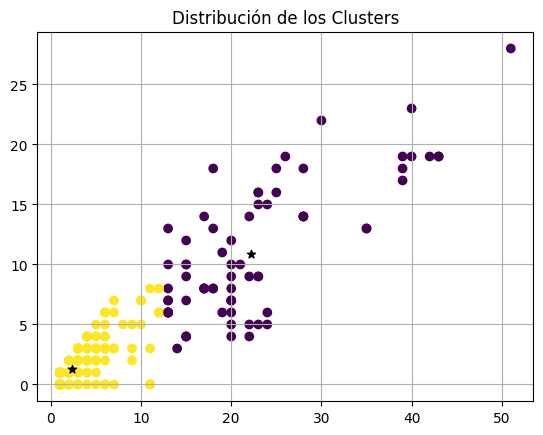

In [ ]:
# Dibujar una gráfica donde cada cluster aparece de un color diferente con su respectivo centroide
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='*')
plt.grid()
plt.title('Distribución de los Clusters')
plt.show()

In [ ]:
Knn=KNeighborsClassifier(n_neighbors=3)
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Generar datos de prueba para el primer subplot
x_, y_ = make_blobs(n_samples=200, centers=6)
k = 6
kmeans_ = KMeans(n_clusters=k)
y_pred_ = kmeans_.fit_predict(x_)
z_ = kmeans_.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


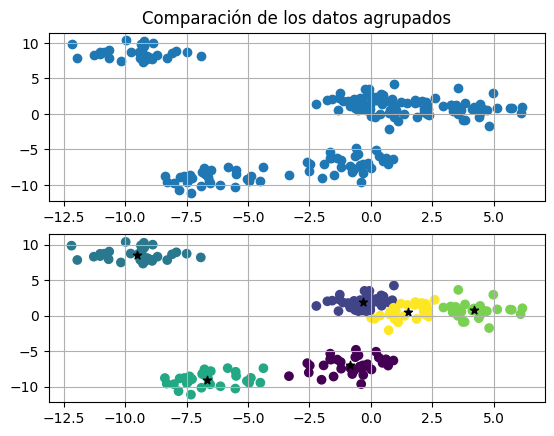

In [ ]:
#Crear el subplot para la comparación de los datos agrupados
fig, ax = plt.subplots(2, 1)
ax[0].scatter(x_[:, 0], x_[:, 1])
ax[0].grid()
ax[0].set_title('Comparación de los datos agrupados')
ax[1].scatter(x_[:, 0], x_[:, 1], c=kmeans_.labels_)
ax[1].scatter(z_[:, 0], z_[:, 1], c='black', marker='*')
ax[1].grid()

plt.show()

In [ ]:
ini = np.array([[-3, 9], [-2, 6], [5, -5], [6, -11]])
kmeans_iter = KMeans(n_clusters=4, init=ini, n_init=1000)
x, y = make_blobs(n_samples=200, centers=4)

y_pred_iter = kmeans_iter.fit_predict(x)
print('Las predicciones son:', y_pred_iter)
print('Los centros de los cluester son:', kmeans_iter.cluster_centers_)
print('La inercia es:', kmeans_iter.inertia_)
print('El puntaje del modelo es:', kmeans_iter.score(x))

Las predicciones son: [2 2 2 2 2 1 2 2 2 3 3 2 1 2 0 2 2 0 3 2 0 3 2 1 3 1 2 3 1 2 2 1 2 2 2 3 3
 3 2 0 1 3 2 2 2 2 2 3 3 2 3 1 2 3 2 2 2 2 2 0 0 2 3 2 2 0 0 0 3 2 3 2 0 2
 1 2 3 2 2 2 2 1 2 2 0 1 3 3 2 3 3 2 3 3 2 1 1 2 2 2 2 3 3 0 3 2 3 0 1 3 1
 0 2 2 1 1 2 2 3 2 3 2 3 2 2 3 2 2 3 2 2 3 2 3 0 3 2 1 1 1 2 2 0 2 2 2 1 3
 2 3 2 2 2 2 2 2 3 3 1 2 1 3 1 2 2 3 3 3 1 3 2 0 3 2 2 3 1 0 1 1 3 2 2 2 2
 2 2 1 2 2 2 1 2 3 2 0 2 1 2 2]
Los centros de los cluester son: [[-9.95943551  3.56761988]
 [-8.31073513  2.64753073]
 [ 7.27609249 -0.03564068]
 [-9.07400529 -9.3981833 ]]
La inercia es: 1055.5607309596326
El puntaje del modelo es: -1055.5607309596323


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=1000.
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=1000.
  super()._check_params_vs_input(X, default_n_init=10)


Las predicciones son: [1 0 0 3 0 3 2 0 2 2 0 0 3 3 2 1 2 0 2 1 2 3 0 3 3 2 3 3 3 0 1 2 1 0 0 3 3
 0 0 0 2 3 2 3 1 2 2 1 1 2 3 0 0 3 3 2 2 3 0 3 1 1 1 0 0 0 1 1 0 3 2 1 3 3
 1 1 0 0 2 3 2 3 3 0 1 0 2 2 0 1 2 2 3 3 2 3 1 2 3 1 2 0 2 3 3 0 3 0 2 0 2
 1 3 3 2 0 1 2 2 1 0 1 0 3 0 2 1 1 1 1 1 1 2 3 1 1 2 2 2 1 2 1 1 1 1 3 0 0
 2 1 2 1 1 2 3 1 3 1 3 1 0 2 2 0 1 2 2 1 0 1 0 1 3 2 3 3 0 1 2 3 3 3 2 3 0
 0 0 0 1 3 3 0 0 0 1 0 2 2 0 3]
Los centros de los cluester son: [[-4.23204615 -1.83737254]
 [-0.04021305  3.80969313]
 [ 6.63069676 -3.06924157]
 [-9.38447937  0.43495201]]
La inercia es: 356.17466442315117
El puntaje del modelo es: -356.1746644231511


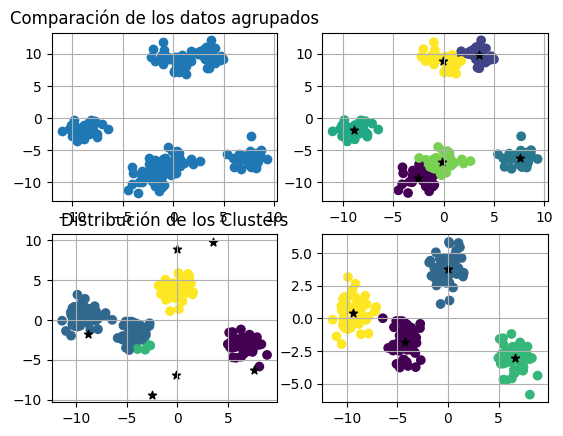

In [ ]:
from sklearn.datasets import make_blobs

# Generar datos de prueba del primer subplot
x_, y_ = make_blobs(n_samples=200, centers=6)
k = 6
kmeans_ = KMeans(n_clusters=k)
y_pred_ = kmeans_.fit_predict(x_)
z_ = kmeans_.cluster_centers_

# Generar datos de prueba del segundo subplot
x, y = make_blobs(n_samples=200, centers=4)

ini = np.array([[-3, 9], [-2, 6], [5, -5], [6, -11]])
kmeans_iter = KMeans(n_clusters=4, init=ini, n_init=1000)
y_pred_iter = kmeans_iter.fit_predict(x)

print('Las predicciones son:', y_pred_iter)
print('Los centros de los cluester son:', kmeans_iter.cluster_centers_)
print('La inercia es:', kmeans_iter.inertia_)
print('El puntaje del modelo es:', kmeans_iter.score(x))

# Graficar los resultados
fig, ax = plt.subplots(2, 2)
ax[0, 0].scatter(x_[:, 0], x_[:, 1])
ax[0, 0].grid()
ax[0, 0].set_title('Comparación de los datos agrupados')

ax[0, 1].scatter(x_[:, 0], x_[:, 1], c=kmeans_.labels_)
ax[0, 1].scatter(z_[:, 0], z_[:, 1], c='black', marker='*')
ax[0, 1].grid()

ax[1, 0].scatter(x[:, 0], x[:, 1], c=kmeans_.predict(x))
ax[1, 0].scatter(kmeans_.cluster_centers_[:, 0], kmeans_.cluster_centers_[:, 1], c='black', marker='*')
ax[1, 0].grid()
ax[1, 0].set_title('    Distribución de los Clusters')

ax[1, 1].scatter(x[:, 0], x[:, 1], c=kmeans_iter.labels_)
ax[1, 1].scatter(kmeans_iter.cluster_centers_[:, 0], kmeans_iter.cluster_centers_[:, 1], c='black', marker='*')
ax[1, 1].grid()

plt.show()


In [ ]:
# Aplicación del algoritmo KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
accuracy = classifier.score(X_test, y_test)

# Conclusión de la clasificación
if accuracy >= 0.8:
    print("La clasificación fue buena.")
else:
    print("La clasificación fue deficiente.")

La clasificación fue deficiente.


In [ ]:
#Analisis
#1.Las predicciones indican que cada punto de datos ha sido asignado a un cluster específico. Los clusters están numerados del 0 al 3, y se pueden observar varios grupos con la misma etiqueta.

#2.Los centros de los clusters representan las ubicaciones en el espacio donde se encuentran los centroides de cada cluster. En este caso, se tienen cuatro centros de clusters con coordenadas (-9.959, 3.568), (-8.311, 2.648), (7.276, -0.036), y (-9.074, -9.398).

#3.La inercia es una medida de la suma de las distancias cuadradas de cada punto de datos al centroide de su cluster correspondiente. En este caso, la inercia es 1055.561, lo que indica una dispersión de los puntos respecto a sus centroides.

#4.El puntaje del modelo es igual a la negación de la inercia. En este caso, el puntaje del modelo es -1055.561, lo que indica una baja calidad del ajuste, ya que el valor es negativo y mayor en magnitud que la inercia positiva.